# Predictive Modeling 
##### notebook code (C) 2022 Timothy James Becker
## CH10: Neural Network (NN) Methods

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/420px-Colored_neural_network.svg.png" width=140> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Typical_cnn.png/593px-Typical_cnn.png" width=400>

Artificial Neural Networks have been around for a very long time (1960s...) and have enjoyed several cycles of popularity followed by abandonment (for SVM, Random Forest, etc) only to become more popular then ever given new forms (Recurrent RNN, Convolutional CNN, Deep refers to the number of connected layers).  The first effective form was the Multilayer Perceptron which is a full-connected layer and had some success in the 1990s.  We will get into the various forms of networks (topology) along with the application areas in which they excel. We will use the keras NN framework that is part of the [tensorflow](https://tensorflow.rstudio.com/installation/) package.

In [1]:
#install.packages('tensorflow')
#library('tensorflow')
#tf$constant('CheckInstall')

Loaded Tensorflow version 2.7.0



tf.Tensor(b'CheckInstall', shape=(), dtype=string)

### 10.1-10.2 Single/Multiple Layer Networks

NN are similiar to Trees in some ways since they approximate linear or non-linear functions.  They differ in the construction of the network which is variable in topology and has a great impact on performance. [Interactive NN](http://playground.tensorflow.org). Mathematically a simply feed-forward network FFNN can be expressed as:

#### $f(X) = \beta_0 + \displaystyle\sum_{k=1}^{K}\beta_kh_k(X) = \beta_0 + \sum_{k=1}^{K}\beta_kg(w_{k0}+\sum_{j=1}^{p}w_{kj}X_j)$

The $K$ is a selectable number of hidden units in the single layer while the $g(z)$ above is called an activation function in NN lingo. Some well known non-linear activation functions for NN are:

#### <u>Sigmoid</u>: 

#### $g(z) = \frac{1}{1+e^{-z}} = (1+e^{-z})^{-1}$

#### <u>Rectified Linear Unit (ReLU)</u>

#### $g(z) = \begin{cases}
    0       & \quad \text{if } z<0 \\
    z  & \quad \text{if } z>=0
  \end{cases}$


#### <u>Question</u>: Why don't we use a linear function for $g(z)$?

For multilayer networks (MLP) we feed the output of the activation into the next layer instead of the original input.

#### <u>Multiclass Using Soft-Max</u>

When we want to do 3+-classification tasks using NN models, we can make use of the soft-max method we discuss before:

#### $f_m(X) = Pr(Y=m | X) = \frac{e^{Z_m}}{\sum_{l=0}^{L-1}e^{Z_l}}$

Here $Z_m$ is a linear model for each class from the final output

### 10.3 Convolution Layers (CNN)

Convolution nodes in a network are design to learn the features and so are a type of feature-mapping or feature learning.  They have proven to be effective at image classification tasks by making use of these hierarchical feature-maps.

If we assume a small input picture:

#### $\begin{pmatrix} a & b & c \\ d & e & f \\ g & h & i \\ j & k & l\end{pmatrix}$

And then convolve it with the convulation matrix:

#### $\begin{pmatrix} \alpha & \beta \\ \gamma & \sigma \end{pmatrix}$

We get:

#### $\begin{pmatrix} a\alpha+b\beta+d\gamma+e\sigma & b\alpha+c\beta+e\gamma+f\sigma \\  d\alpha+e\beta+g\gamma+h\sigma & e\alpha+f\beta+h\gamma+i\sigma \\ g\alpha+h\beta+j\gamma+k\sigma & h\alpha+i\beta+k\gamma+l\sigma \end{pmatrix}$

More generally convolutional kernels are odd sizes such as 3x3, 5x5, etc:

[convolutional kernels are 2D image filters](https://en.wikipedia.org/wiki/Kernel_(image_processing))

#### Pooling Convolutional Layers

Convolutional Layers for images are very large (think HD images are 1080x720 pixels is ~1 million nodes!). Pooling is a way to reduce the total node count (lower the estimated feature space) while retaining most of the underlying information content.  You can think of it as a type of convolutional down-sampling (reducing the image size)

<u>Max Pooling</u>: Take the maximal value in the matrix (2x2 here):

#### $\begin{pmatrix} 30 & 21 & 10 & 13 \\ 31 & 26 & 15 & 12 \\ 28 & 17 & 7 & 9 \\ 18 & 26 & 5 & 2\end{pmatrix}$

Would become:

#### $\begin{pmatrix} 31 & 15 \\ 28 & 9\end{pmatrix}$


#### Dropout, Batch Regularization, Kernel Regularization

There are many ways to decrease overfitting with CNN

<u>Dropout</u>: remove some of the connections between layers

<u>Batch Regularization</u> make all training batches fit within 0-1

<u>Kernel Regularization</u> creates a penalty for updating/changing node weights (in the hidden layers) this means the model will try to change the weights as little as possible



#### Data Augmentation (images)

With image classification the transformation or the object can play a hige role. Even a basic affine transform can make the mode more robust to orientation (seeing the same object with some rotation or scaling).  You can learn more about image transformations here: [opencv geometry](https://docs.opencv.org/4.5.5/da/d6e/tutorial_py_geometric_transformations.html)

#### CNNs are automated Image Processing

The operations that we have discussed so far are basically filters that have the abilty to learn patterns in the images.  To really understand the CNN for image tasks, we would need some more background in computer-based image processing techniques.  This is an entire area in CS which is called computer vision.  The most interesting open-source system that would proivde a great learning environment for the student is [opencv](https://docs.opencv.org).  

In [1]:
#first the keras/tensorflow library                                                                
Sys.setenv('CUDA_VISIBLE_DEVICES'=-1) #if you don't have NVIDIA CUDA or want to disable
library('keras')                                                                  
use_backend('tensorflow') 

library('ISLR2')
data(Hitters)
Hitters <- na.omit(Hitters)
X <- scale(model.matrix(Salary~.-1,data=Hitters)) #transform variables into numeric...
Y <- Hitters[,'Salary']
X[1:10,]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,LeagueA,LeagueN,DivisionW,PutOuts,Assists,Errors,NewLeagueN
-Alan Ashby,-0.60175321,-0.5945419,-0.5275454,-1.2038163,-0.52106946,-0.09734151,1.3952334,0.3461306,0.1740416,-0.002914243,-0.1214393,0.25847281,0.43450593,-1.0567429,1.0567429,0.9792988,1.21917406,-0.52219572,0.21294608,1.0730066
-Alvin Davis,0.51156637,0.4913228,0.7285771,0.4406748,0.79254856,1.60631004,-0.8994853,-0.4520036,-0.4091121,-0.075909091,-0.4143150,-0.19921055,0.01035326,0.9427059,-0.9427059,0.9792988,2.10509535,-0.25337958,0.81840359,-0.9284171
-Andre Dawson,0.62697145,0.7350884,0.9569630,0.4015202,1.02436351,-0.18943079,0.7694010,1.2990809,1.3156652,1.894951816,1.4093644,1.56967378,0.35497730,-1.0567429,1.0567429,-1.0172561,-0.32404367,-0.74276281,-0.84660456,1.0730066
-Andres Galarraga,-0.56102200,-0.4615789,-0.1849665,-0.6164981,-0.36652617,-0.51174324,-1.1080961,-0.9890495,-0.9583256,-0.696365303,-0.9457182,-0.87955068,-0.86067453,-1.0567429,1.0567429,-1.0172561,1.83717561,-0.54287389,-0.69524018,1.0730066
-Alfredo Griffin,1.29224779,1.3555825,-0.8701243,0.7539112,-0.01880375,-0.28152006,0.7694010,0.7655337,0.6337765,-0.611204646,0.4220413,0.01726131,-0.25095507,0.9427059,-0.9427059,0.9792988,-0.03111808,2.08325298,2.48341175,-0.9284171
-Al Newman,-1.48426263,-1.5696041,-1.2127031,-1.2429709,-1.68014419,-0.92614497,-1.1080961,-1.0686443,-1.0493469,-0.830189192,-1.0000663,-0.99397151,-0.89475822,-1.0567429,1.0567429,-1.0172561,-0.76700431,0.05679288,-0.24114705,-0.9284171
-Argenis Salazar,-0.71715829,-0.7718259,-1.3268961,-1.2038163,-1.06197100,-1.57076988,-0.8994853,-0.9396308,-0.9475265,-0.842355000,-0.9668536,-0.90738277,-0.94020315,0.9427059,-0.9427059,0.9792988,-0.60625247,1.13205742,0.06158171,-0.9284171
-Andres Thomas,-0.54744494,-0.5945419,-0.6417383,-1.1255072,-0.75288441,-1.52472525,-1.1080961,-1.0131029,-0.9814666,-0.769360151,-0.9940276,-0.91666014,-0.95535146,-1.0567429,1.0567429,0.9792988,-0.52766267,1.18030647,1.57522548,1.0730066
-Andre Thornton,-0.01793928,-0.3507764,0.6143841,-0.2249526,0.56073362,1.09981904,1.1866226,1.1145261,0.9407807,2.235594442,1.2765136,1.73048144,2.29396091,0.9427059,-0.9427059,-1.0172561,-1.03849632,-0.81858274,-1.30069770,-0.9284171
-Alan Trammell,1.15647711,1.1339775,1.0711560,2.0460114,0.90845603,0.82355122,0.5607902,0.8630591,0.8914132,0.252567726,1.0289280,0.53679377,0.86244567,0.9427059,-0.9427059,-1.0172561,-0.18829766,2.24867830,2.02931862,-0.9284171


In [2]:
#get our training and test indecies
n <- dim(Hitters)[1]
split <- 0.20                     #proportion of the test
test  <- sample(seq(1,n),n*split) #seq is the vector 1 to n and we pick n*0.1 here to test
valid <- sample(setdiff(seq(1,n),test),n*split)  #give some for NN training
train <- setdiff(seq(1,n),union(test,valid))  #leave the rest for training
length(test)
length(valid)
length(train)

[1] 52

[1] 52

[1] 159

In [3]:
#set the structure or topology of the MLNN
modnn <- keras_model_sequential() %>%
  layer_dense(units=50,activation="relu",input_shape=ncol(X)) %>%
  layer_dropout(rate=0.4) %>%
  layer_dense(units=1)
modnn %>% compile(loss="mse",
                  optimizer=optimizer_rmsprop(),
                  metrics = list("mean_absolute_error"))
#check it to make sure it is valid...
summary(modnn)

Loaded Tensorflow version 2.7.0



Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1 (Dense)                    (None, 50)                      1050        
                                                                                
 dropout (Dropout)                  (None, 50)                      0           
                                                                                
 dense (Dense)                      (None, 1)                       51          
                                                                                
Total params: 1,101
Trainable params: 1,101
Non-trainable params: 0
________________________________________________________________________________


`geom_smooth()` using formula 'y ~ x'



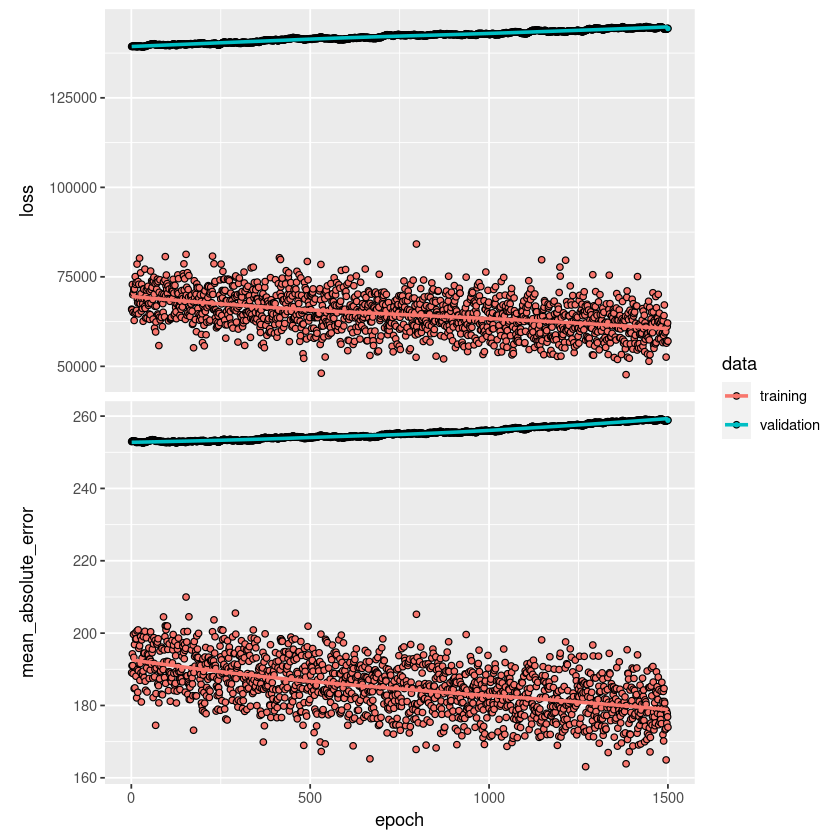

In [6]:
#fit the model-----------------------------------------------------
history <- modnn %>% fit(X[train,], Y[train], 
                         epochs=1500, batch_size=32,
                         validation_data = list(X[valid,], Y[valid]))
plot(history)

In [7]:
mean(abs(Y[test]-predict(modnn,X[test,])))

[1] 302.8375

#### <u>CNN Picture example</u>

A classical example of when to use CNN is for images and image classification tasks.  A popular example dataset is included with the tensorflow/keras R packaged which is called [MNIST](http://yann.lecun.com/exdb/mnist/).  It is a set of small images that are hand written numbers (0-9).  We can train a CNN model to learn how to do number recognition by framing this as a classification problem.

In [8]:
#step [0]: load data-------------------------------------------------------
mnist <- dataset_mnist()
mnist$train$x <- mnist$train$x/255 #normalize make 0-255 pixel value to 0-1
mnist$test$x <- mnist$test$x/255   #normalize make 0-255 pixel value to 0-1

In [9]:
#step [1]: specify the network model, layers, connections, regularizations, activations
model <- keras_model_sequential() %>% 
  layer_flatten(input_shape = c(28, 28)) %>% 
  layer_dense(units = 64, activation = "relu") %>% 
  layer_dropout(0.3) %>% 
  layer_dense(10, activation = "softmax")

In [10]:
#step [2]: compile the model and set the optimization strategy: metric, loss, optimization alogorithm
model %>% 
  compile(
    metrics = "accuracy",
    loss = "sparse_categorical_crossentropy",
    optimizer = "adam"
  )

In [11]:
#step [3]: train the model by setting the hyper-parameters epochs, validation-split
model %>% 
  fit(
    x = mnist$train$x, y = mnist$train$y,
    epochs = 5,
    validation_split = 0.3,
    verbose = 2
  )

In [12]:
#step [4]: create an estimate of model performance using data that was witheld from training
model %>% 
  evaluate(mnist$test$x, mnist$test$y, verbose = 0)

loss  accuracy 
0.1145635 0.9645000

#### <u>CNN better?</u>

Can we do better using CNN layers instead of MLP? We will also use max pooling and dropout inbetween the convolutional layers using a modified CIFAR10 network structure:

In [13]:
#step [1]: specify the network model, layers, connections, regularizations, activations
model <- keras_model_sequential()
model %>%
  # Start with hidden 2D convolutional layer being fed 32x32 pixel images
  layer_conv_2d(
    filter = 32, kernel_size = c(3,3), padding = "same", 
    input_shape = c(28, 28, 1)
  ) %>%
  layer_activation("relu") %>%

  # Second hidden layer
  layer_conv_2d(filter = 32, kernel_size = c(3,3)) %>%
  layer_activation("relu") %>%

  # Use max pooling
  layer_max_pooling_2d(pool_size = c(2,2)) %>%
  layer_dropout(0.25) %>%
  
  # 2 additional hidden 2D convolutional layers
  layer_conv_2d(filter = 32, kernel_size = c(3,3), padding = "same") %>%
  layer_activation("relu") %>%
  layer_conv_2d(filter = 32, kernel_size = c(3,3)) %>%
  layer_activation("relu") %>%

  # Use max pooling once more
  layer_max_pooling_2d(pool_size = c(2,2)) %>%
  layer_dropout(0.25) %>%
  
  # Flatten max filtered output into feature vector 
  # and feed into dense layer
  layer_flatten() %>%
  layer_dense(512) %>%
  layer_activation("relu") %>%
  layer_dropout(0.5) %>%

  # Outputs from dense layer are projected onto 10 unit output layer
  layer_dense(10) %>%
  layer_activation("softmax")

In [15]:
#step [2]: compile the model and set the optimization strategy: metric, loss, optimization alogorithm
model %>% 
  compile(
    metrics = "accuracy",
    loss = "sparse_categorical_crossentropy",
    optimizer = "adam"
  )

summary(model)

Model: "sequential_2"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 conv2d_3 (Conv2D)                  (None, 28, 28, 32)              320         
                                                                                
 activation_5 (Activation)          (None, 28, 28, 32)              0           
                                                                                
 conv2d_2 (Conv2D)                  (None, 26, 26, 32)              9248        
                                                                                
 activation_4 (Activation)          (None, 26, 26, 32)              0           
                                                                                
 max_pooling2d_1 (MaxPooling2D)     (None, 13, 13, 32)              0           
                                                                                
 dropo

In [16]:
#step [3]: train the model by setting the hyper-parameters epochs, validation-split
model %>% 
  fit(
    x = mnist$train$x, y = mnist$train$y,
    epochs = 5,
    validation_split = 0.3,
    verbose = 2
  )

In [20]:
#step [4]: create an estimate of model performance using data that was witheld from training
model %>% 
  evaluate(mnist$test$x, mnist$test$y, verbose = 0)

loss   accuracy 
0.02556906 0.99229997

#### <u>Question</u> Is this performance realistic to what you would get using this model in the real-world?